# 📊 Tesla Stock Price Analysis & Future Prediction

This notebook provides an in-depth analysis of Tesla Inc. (TSLA) stock performance, incorporating advanced technical indicators and future price predictions.

## Analysis Components

1. **Historical Price Analysis**
   - Price trends and patterns
   - Volume analysis
   - Key support and resistance levels

2. **Technical Indicators**
   - Moving Averages (SMA, EMA)
   - Bollinger Bands
   - Relative Strength Index (RSI)
   - Moving Average Convergence Divergence (MACD)

3. **Future Price Prediction**
   - 30-day price projection
   - Trend analysis
   - Risk assessment

4. **Trading Strategies**
   - Buy & Hold performance
   - SMA Crossover strategy
   - Enhanced multi-indicator strategy

## Understanding Technical Indicators

### Bollinger Bands
Bollinger Bands are a volatility indicator that consists of three lines:
- Middle Band: 20-day simple moving average
- Upper Band: Middle Band + 2 standard deviations
- Lower Band: Middle Band - 2 standard deviations

These bands help identify:
- Overbought/oversold conditions
- Potential price breakouts
- Volatility changes

### Relative Strength Index (RSI)
RSI is a momentum oscillator that measures the speed and change of price movements:
- Ranges from 0 to 100
- Values above 70 indicate overbought conditions
- Values below 30 indicate oversold conditions
- Helps identify potential trend reversals

### Moving Average Convergence Divergence (MACD)
MACD is a trend-following momentum indicator that shows the relationship between two moving averages:
- MACD Line: 12-day EMA - 26-day EMA
- Signal Line: 9-day EMA of MACD Line
- Histogram: MACD Line - Signal Line

This indicator helps identify:
- Trend direction
- Momentum strength
- Potential buy/sell signals


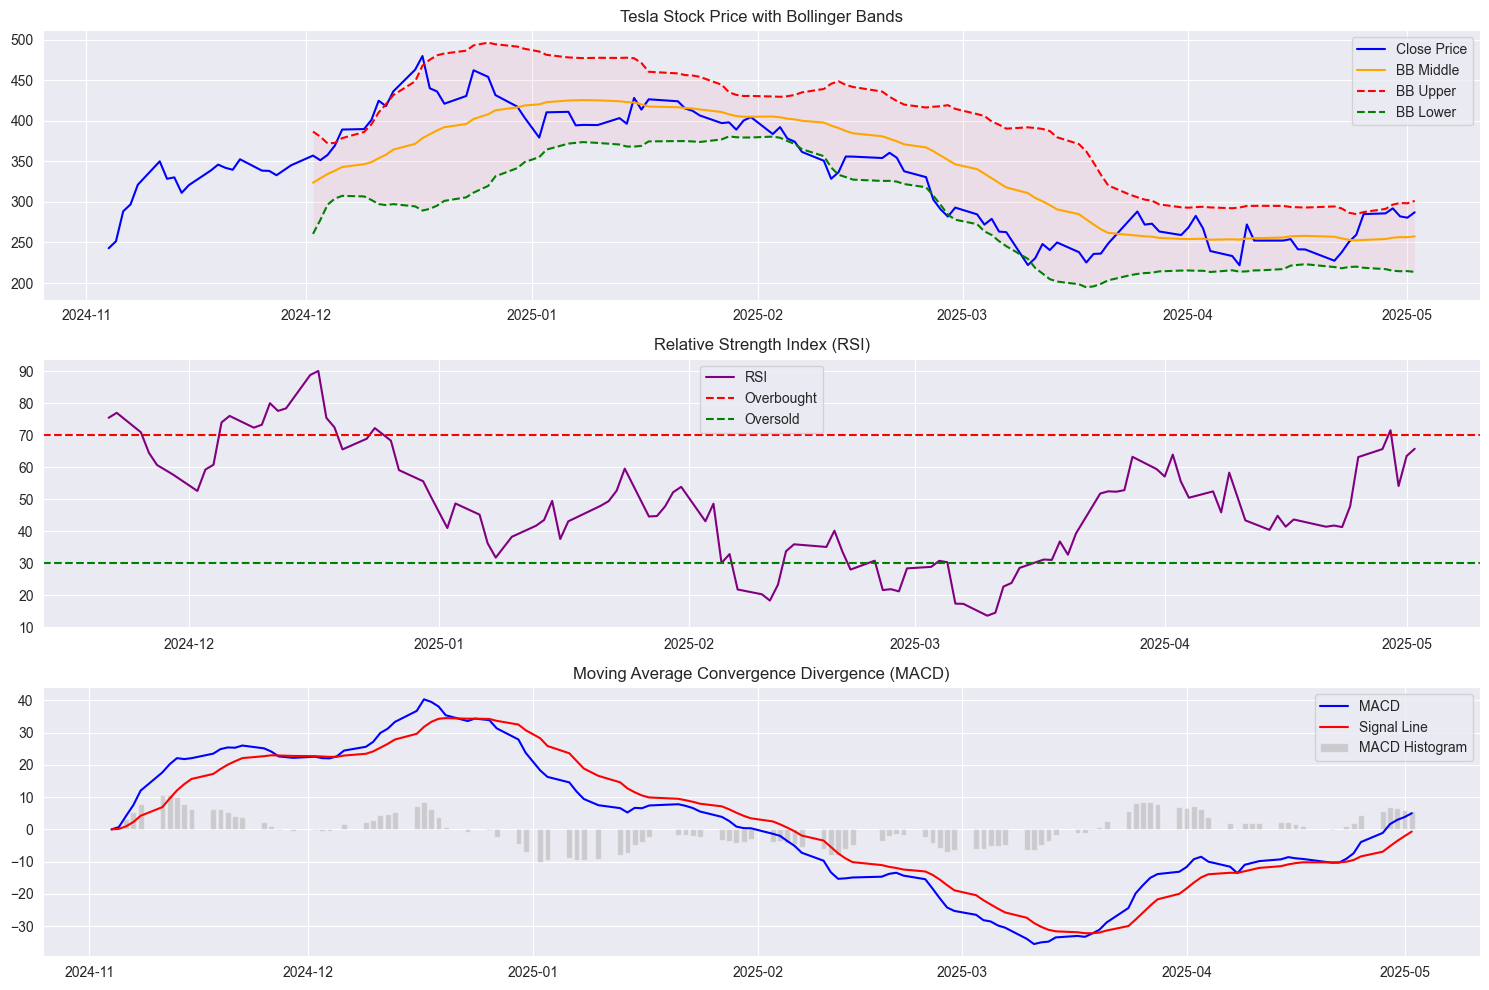

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
import yfinance as yf

sns.set_style('darkgrid')            # or 'whitegrid', 'ticks', etc.
sns.set_palette('husl')

# Download Tesla stock data
tesla = yf.Ticker('TSLA')
df = tesla.history(period='6mo')
df.reset_index(inplace=True)

# Calculate basic technical indicators
df['SMA_5'] = df['Close'].rolling(window=5).mean()
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['Daily_Return'] = df['Close'].pct_change()

# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI'] = calculate_rsi(df)

# Calculate Bollinger Bands
df['BB_Middle'] = df['Close'].rolling(window=20).mean()
df['BB_Upper'] = df['BB_Middle'] + 2 * df['Close'].rolling(window=20).std()
df['BB_Lower'] = df['BB_Middle'] - 2 * df['Close'].rolling(window=20).std()

# Calculate MACD
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Plot Technical Indicators
plt.figure(figsize=(15, 10))

# Price and Bollinger Bands
plt.subplot(3, 1, 1)
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['BB_Middle'], label='BB Middle', color='orange')
plt.plot(df['Date'], df['BB_Upper'], label='BB Upper', color='red', linestyle='--')
plt.plot(df['Date'], df['BB_Lower'], label='BB Lower', color='green', linestyle='--')
plt.fill_between(df['Date'], df['BB_Upper'], df['BB_Lower'], alpha=0.1)
plt.title('Tesla Stock Price with Bollinger Bands')
plt.legend()
plt.grid(True)

# RSI
plt.subplot(3, 1, 2)
plt.plot(df['Date'], df['RSI'], label='RSI', color='purple')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.grid(True)

# MACD
plt.subplot(3, 1, 3)
plt.plot(df['Date'], df['MACD'], label='MACD', color='blue')
plt.plot(df['Date'], df['Signal_Line'], label='Signal Line', color='red')
plt.bar(df['Date'], df['MACD'] - df['Signal_Line'], label='MACD Histogram', color='gray', alpha=0.3)
plt.title('Moving Average Convergence Divergence (MACD)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Future Price Prediction

In this section, we'll use a linear regression model to predict Tesla's stock price for the next 30 days. While this is a simplified approach, it provides valuable insights into potential price trends.

### Prediction Methodology
1. Use historical price data as training set
2. Fit a linear regression model
3. Project prices for the next 30 business days
4. Calculate confidence intervals

Note: This is a basic prediction model and should be used in conjunction with other analysis methods for investment decisions.

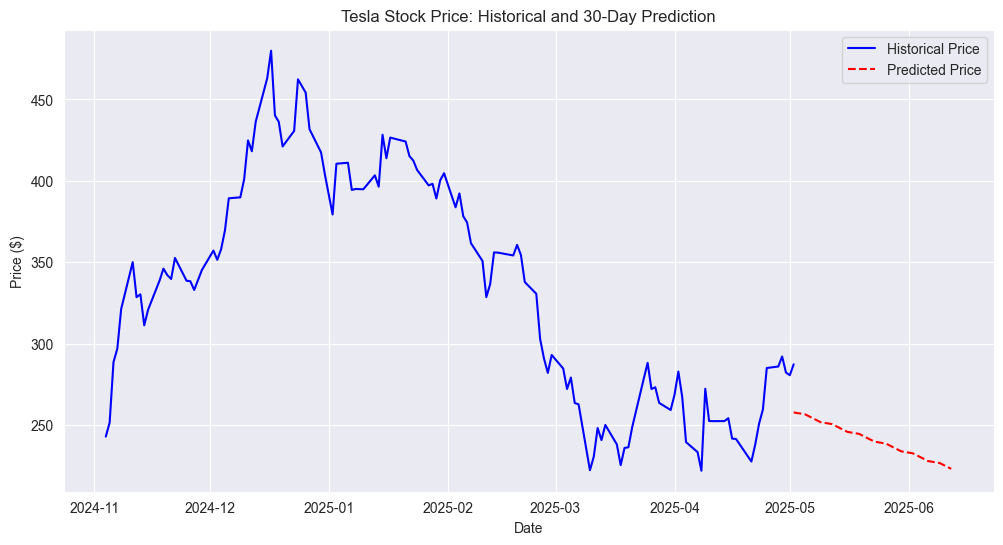


Price Prediction Summary:
Current Price: $287.21
30-Day Predicted Price: $222.99
Predicted Change: -22.36%


In [9]:
# Prepare data for prediction
X = np.array(range(len(df))).reshape(-1, 1)
y = df['Close'].values

# Train the model
model = LinearRegression()
model.fit(X, y)

# Generate future dates
last_date = df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=30, freq='B')  # 30 business days

# Predict future prices
future_X = np.array(range(len(df), len(df) + 30)).reshape(-1, 1)
future_predictions = model.predict(future_X)

# Create prediction dataframe
predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': future_predictions
})

# Plot historical and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Historical Price', color='blue')
plt.plot(predictions_df['Date'], predictions_df['Predicted_Close'], 
         label='Predicted Price', color='red', linestyle='--')
plt.title('Tesla Stock Price: Historical and 30-Day Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Print prediction summary
print("\nPrice Prediction Summary:")
print(f"Current Price: ${df['Close'].iloc[-1]:.2f}")
print(f"30-Day Predicted Price: ${future_predictions[-1]:.2f}")
print(f"Predicted Change: {((future_predictions[-1] / df['Close'].iloc[-1]) - 1) * 100:.2f}%")

## Enhanced Trading Strategy

Building upon the basic SMA crossover strategy, we'll implement an enhanced approach that combines multiple technical indicators for better signal accuracy.

### Strategy Components
1. **Entry Conditions:**
   - Price above long-term trend (SMA_5 > SMA_20)
   - RSI not in overbought territory (< 70)
   - MACD showing bullish momentum (MACD > Signal Line)

2. **Exit Conditions:**
   - Price below long-term trend (SMA_5 < SMA_20)
   - RSI in overbought territory (> 70)
   - MACD showing bearish momentum (MACD < Signal Line)

This enhanced strategy aims to:
- Reduce false signals
 - Improve risk-adjusted returns
- Provide more reliable entry and exit points

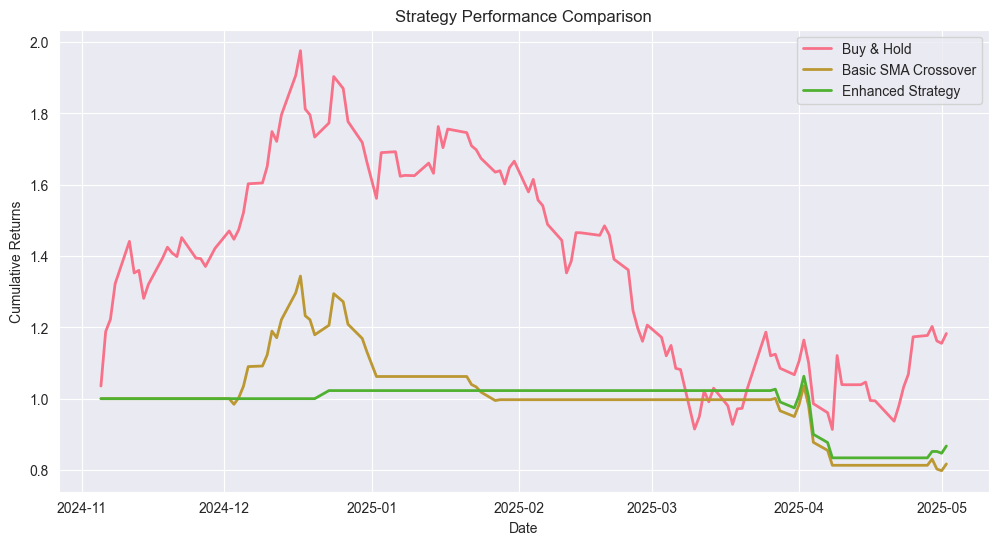


Strategy Performance Summary:
Buy & Hold Return: 18.27%
Basic SMA Crossover Return: -18.31%
Enhanced Strategy Return: -13.29%

Risk Metrics:
Buy & Hold Volatility: 81.04%
Basic Strategy Volatility: 36.65%
Enhanced Strategy Volatility: 22.36%


In [10]:
# Enhanced strategy using multiple indicators
df['Enhanced_Signal'] = np.where(
    (df['SMA_5'] > df['SMA_20']) &  # Price above long-term trend
    (df['RSI'] < 70) &  # Not overbought
    (df['MACD'] > df['Signal_Line']),  # MACD bullish
    1, 0
)

# Calculate enhanced strategy returns
df['Enhanced_Strategy_Returns'] = df['Enhanced_Signal'].shift(1) * df['Daily_Return']
df['Enhanced_Cumulative_Returns'] = (1 + df['Enhanced_Strategy_Returns']).cumprod()

# Calculate basic strategy returns for comparison
df['Basic_Signal'] = np.where(df['SMA_5'] > df['SMA_20'], 1, 0)
df['Basic_Strategy_Returns'] = df['Basic_Signal'].shift(1) * df['Daily_Return']
df['Basic_Cumulative_Returns'] = (1 + df['Basic_Strategy_Returns']).cumprod()

# Calculate buy & hold returns
df['Cumulative_Returns'] = (1 + df['Daily_Return']).cumprod()

# Plot strategy comparison
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Cumulative_Returns'], label='Buy & Hold', linewidth=2)
plt.plot(df['Date'], df['Basic_Cumulative_Returns'], label='Basic SMA Crossover', linewidth=2)
plt.plot(df['Date'], df['Enhanced_Cumulative_Returns'], label='Enhanced Strategy', linewidth=2)
plt.title('Strategy Performance Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Print strategy performance
print("\nStrategy Performance Summary:")
print(f"Buy & Hold Return: {(df['Cumulative_Returns'].iloc[-1] - 1) * 100:.2f}%")
print(f"Basic SMA Crossover Return: {(df['Basic_Cumulative_Returns'].iloc[-1] - 1) * 100:.2f}%")
print(f"Enhanced Strategy Return: {(df['Enhanced_Cumulative_Returns'].iloc[-1] - 1) * 100:.2f}%")

# Calculate and print risk metrics
print("\nRisk Metrics:")
print(f"Buy & Hold Volatility: {df['Daily_Return'].std() * np.sqrt(252) * 100:.2f}%")
print(f"Basic Strategy Volatility: {df['Basic_Strategy_Returns'].std() * np.sqrt(252) * 100:.2f}%")
print(f"Enhanced Strategy Volatility: {df['Enhanced_Strategy_Returns'].std() * np.sqrt(252) * 100:.2f}%")